In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import logging

In [2]:
from pytrain.fileio import read_train_files
from pytrain.twiss import *
from pytrain.machine import *
from pytrain.solver import solve_train

In [3]:
logging.basicConfig(level='INFO')

In [4]:
machine, twiss_b1, twiss_b2, maps_b1, maps_b2 = read_train_files('train-output-withtcp')

# Closed orbit - no BB

In [5]:
oneturn_b1 = oneturn_map(maps_b1)
oneturn_b2 = oneturn_map(maps_b2)

In [6]:
z1 = closed_orbit(oneturn_b1)
orbit1 = track_orbit(z1, maps_b1)

In [7]:
z2 = closed_orbit(oneturn_b2)
orbit2 = track_orbit(z2, maps_b2)

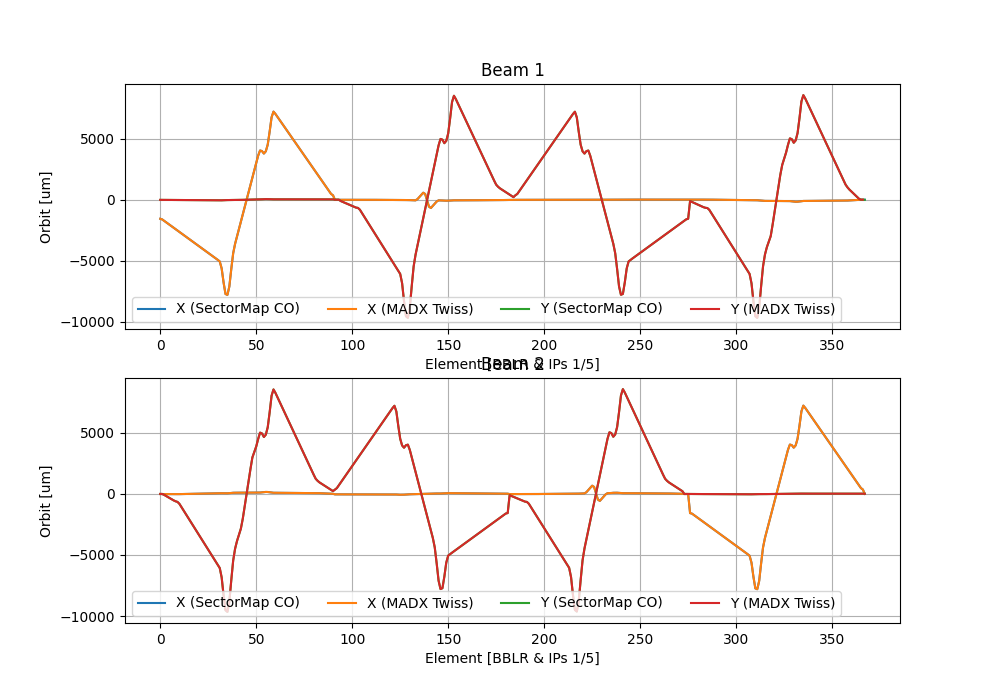

In [8]:
orbit1_arr = np.array(list(orbit1.values()))[:, [0,2]]
orbit2_arr = np.array(list(orbit2.values()))[:, [0,2]]

twiss_orbit1_arr = np.array([[t.X, t.Y] for e,t in twiss_b1.items() if e in maps_b1])
twiss_orbit2_arr = np.array([[t.X, t.Y] for e,t in twiss_b2.items() if e in maps_b2])

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.title('Beam 1')
plt.plot(orbit1_arr[:,0]*1e6)
plt.plot(twiss_orbit1_arr[:,0]*1e6)
plt.plot(orbit1_arr[:,1]*1e6)
plt.plot(twiss_orbit1_arr[:,1]*1e6)
plt.grid(True)
plt.legend(['X (SectorMap CO)', 'X (MADX Twiss)','Y (SectorMap CO)', 'Y (MADX Twiss)'], ncols=4)
plt.ylabel('Orbit [um]')
plt.xlabel('Element [BBLR & IPs 1/5]')

plt.subplot(2,1,2)
plt.title('Beam 2')
plt.plot(orbit2_arr[:,0]*1e6)
plt.plot(twiss_orbit2_arr[:,0]*1e6)
plt.plot(orbit2_arr[:,1]*1e6)
plt.plot(twiss_orbit2_arr[:,1]*1e6)
plt.grid(True)
plt.legend(['X (SectorMap CO)', 'X (MADX Twiss)','Y (SectorMap CO)', 'Y (MADX Twiss)'], ncols=4)
plt.ylabel('Orbit [um]')
plt.xlabel('Element [BBLR & IPs 1/5]')

plt.show()
plt.tight_layout()

In [9]:
plt.figure(figsize=(10, 5))
plt.title('Difference SectorMap CO - MAD-X Twiss')
plt.plot(orbit1_arr[:-1,0]*1e6 - twiss_orbit1_arr[:,0]*1e6)
plt.plot(orbit1_arr[:-1,1]*1e6 - twiss_orbit1_arr[:,1]*1e6)
plt.plot(orbit2_arr[:,0]*1e6 - twiss_orbit2_arr[:,0]*1e6)
plt.plot(orbit2_arr[:,1]*1e6 - twiss_orbit2_arr[:,1]*1e6)
plt.grid(True)
plt.legend(['X (SectorMap CO)', 'X (MADX Twiss)','Y (SectorMap CO)', 'Y (MADX Twiss)'], ncols=4)
plt.ylabel('Orbit [um]')
plt.xlabel('Element [BBLR & IPs 1/5]')

plt.show()
plt.tight_layout()

In [10]:
tune(oneturn_b1, z1)

(0.3129876103201765, 0.3170018057053552)

In [11]:
tune(oneturn_b2, z2)

(0.3130255185250696, 0.31700830770079)

In [12]:
chroma(oneturn_b1, z1)

(20.001033262265196, 20.001895117057895)

In [13]:
chroma(oneturn_b2, z2)

(19.998304833481413, 19.998057500029315)

# Filling Scheme

In [14]:
import requests
fs = requests.get('https://lpc.web.cern.ch/cgi-bin/selectScheme.py?schemeName=25ns_2374b_2361_1730_1773_236bpi_13inj_hybrid_2INDIV.csv&schemePath=%2Fdata%2FfillingSchemes%2F2023%2Fcandidates&relPath=..%2FfillingSchemes%2F2023%2Fcandidates').json()
buckets_b1 = np.squeeze(fs['data']['ring_1'])
buckets_b2 = np.squeeze(fs['data']['ring_2'])

In [15]:
filled_b1 = np.zeros((machine.num_slots,), dtype=bool)
filled_b2 = np.zeros((machine.num_slots,), dtype=bool)
filled_b1[buckets_b1 // 10] = True
filled_b2[buckets_b2 // 10] = True

In [16]:
int_b1 = filled_b1 * 1.0e11
int_b2 = filled_b2 * 1.0e11
emit_b1x = filled_b1 * 2.1e-6
emit_b1y = filled_b1 * 1.9e-6
emit_b2x = filled_b2 * 2.1e-6
emit_b2y = filled_b2 * 1.9e-6

In [17]:
filling_scheme = FillingScheme(int_b1, int_b2, emit_b1x, emit_b1y, emit_b2x, emit_b2y)

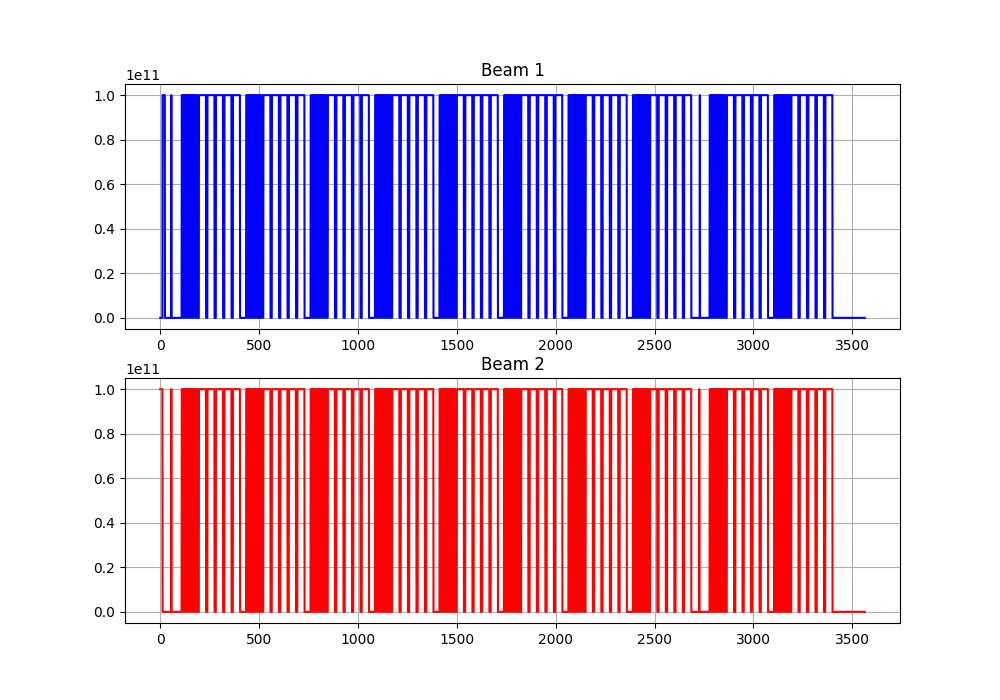

In [18]:
plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.title('Beam 1')
plt.plot(filling_scheme.intensity_b1, 'b')
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Beam 2')
plt.plot(filling_scheme.intensity_b2, 'r')
plt.grid(True)

plt.show()
plt.tight_layout()

# Closed orbit - bunch by bunch with BB

In [19]:
result = solve_train(machine, filling_scheme, twiss_b1, maps_b1, twiss_b2, maps_b2)

INFO:pytrain.solver:Starting iteration 1 - Beam 1


Iteration 1 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 1 - Beam 2


Iteration 1 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 1 done: max. closed-orbit error B1 / B2 = 5.8796e-05 / 7.9902e-05
INFO:pytrain.solver:Starting iteration 2 - Beam 1


Iteration 2 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 2 - Beam 2


Iteration 2 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 2 done: max. closed-orbit error B1 / B2 = 3.6638e-06 / 6.9350e-07
INFO:pytrain.solver:Starting iteration 3 - Beam 1


Iteration 3 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 3 - Beam 2


Iteration 3 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 3 done: max. closed-orbit error B1 / B2 = 2.6677e-08 / 5.7539e-09
INFO:pytrain.solver:Starting iteration 4 - Beam 1


Iteration 4 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 4 - Beam 2


Iteration 4 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 4 done: max. closed-orbit error B1 / B2 = 2.0445e-10 / 7.3236e-11


In [20]:
co_b1_x, co_b1_y = result.bunch_positions_b1('MKIP5')
co_b2_x, co_b2_y = result.bunch_positions_b2('MKIP5')

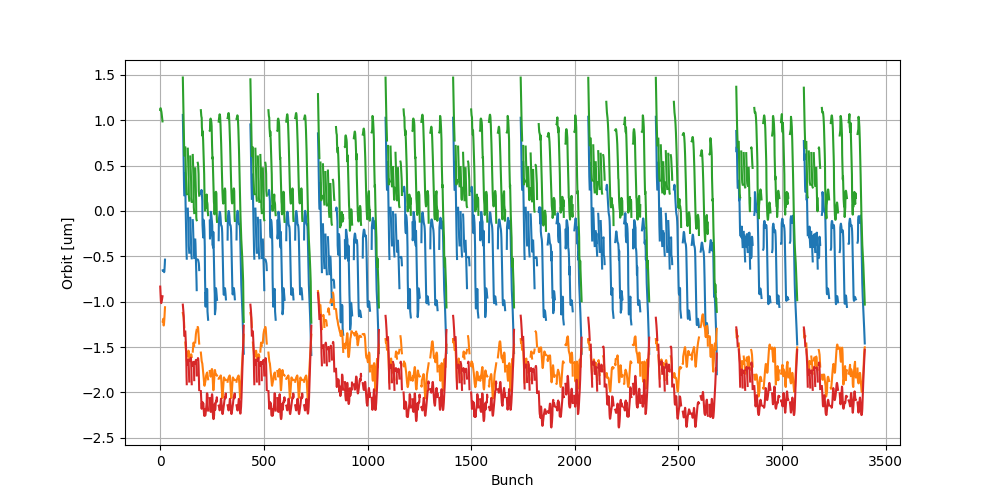

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_x*1e6)
plt.plot(co_b1_y*1e6)
plt.plot(co_b2_x*1e6)
plt.plot(co_b2_y*1e6)
plt.grid(True)
plt.ylabel('Orbit [um]')
plt.xlabel('Bunch')
plt.show()

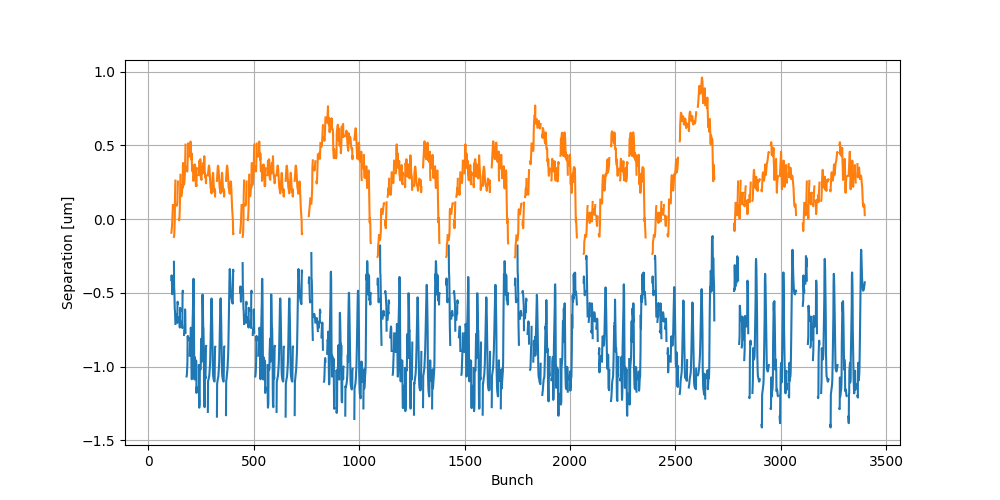

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_x*1e6-co_b2_x*1e6)
plt.plot(co_b1_y*1e6-co_b2_y*1e6)
plt.grid(True)
plt.ylabel('Separation [um]')
plt.xlabel('Bunch')
plt.show()

In [23]:
co_b1_px, co_b1_py = result.bunch_angles_b1('MKIP5')
co_b2_px, co_b2_py = result.bunch_angles_b2('MKIP5')

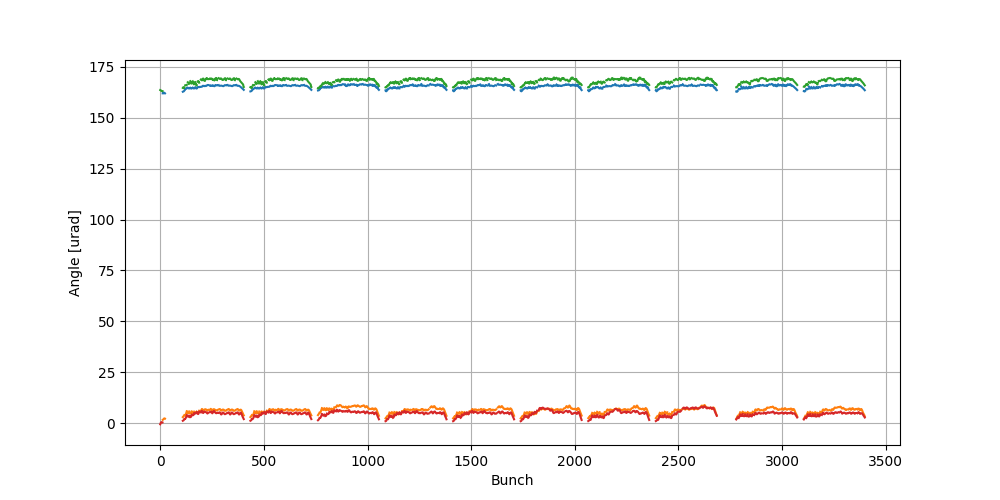

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_px*1e6)
plt.plot(co_b1_py*1e6)
plt.plot(co_b2_px*1e6)
plt.plot(co_b2_py*1e6)
plt.grid(True)
plt.ylabel('Angle [urad]')
plt.xlabel('Bunch')
plt.show()

In [25]:
qx1, qy1 = result.bunch_tunes_b1()
qx2, qy2 = result.bunch_tunes_b2()

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(qx1)
plt.plot(qy1)
plt.plot(qx2)
plt.plot(qy2)
plt.grid(True)
plt.ylabel('Tune')
plt.xlabel('Bunch')
plt.legend(['B1X', 'B1Y', 'B2X', 'B2Y'])
plt.show()

In [27]:
qpx1, qpy1 = result.bunch_chromas_b1()
qpx2, qpy2 = result.bunch_chromas_b2()

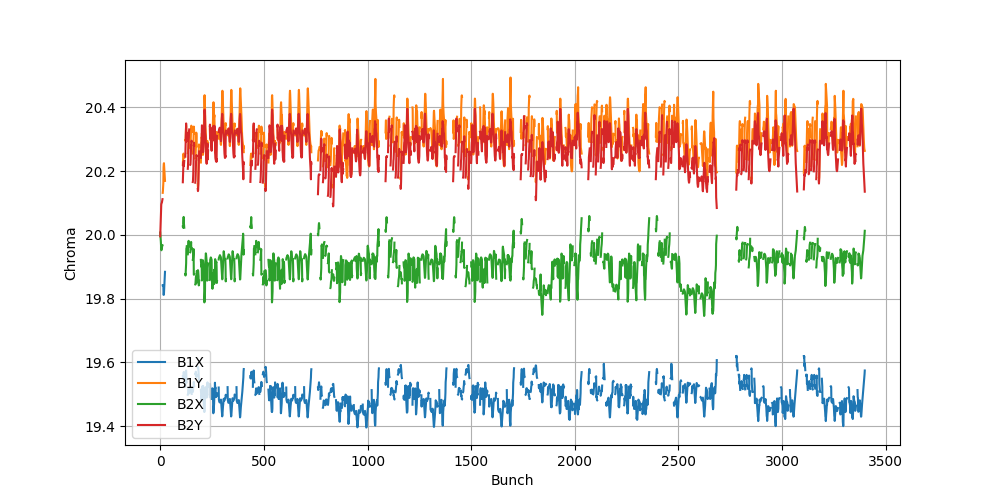

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(qpx1)
plt.plot(qpy1)
plt.plot(qpx2)
plt.plot(qpy2)
plt.grid(True)
plt.ylabel('Chroma')
plt.xlabel('Bunch')
plt.legend(['B1X', 'B1Y', 'B2X', 'B2Y'])
plt.show()

In [29]:
co_b1_x, co_b1_y = result.bunch_positions_b1('TCP.D6L7.B1')
co_b2_x, co_b2_y = result.bunch_positions_b2('MKIP5')